In [201]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['sample_submission_NDF.csv', 'age_gender_bkts.csv', 'sessions.csv', 'train_users_2.csv', 'test_users.csv', 'countries.csv', 'sample_submission.csv']


In [202]:
train_user = pd.read_csv('../input/train_users_2.csv')

In [203]:
countries = pd.read_csv('../input/countries.csv')
age_gender = pd.read_csv('../input/age_gender_bkts.csv')
sessions = pd.read_csv('../input/sessions.csv')

In [204]:
# print('Data For train_user')
# train_user.info()
# train_user.isnull().sum()
# train_user.describe()
# train_user.head()
# print('Data for Countries')
# print(countries.info())
# print(countries.isnull().sum())
# print(countries.describe())
# print(countries.head())
# print('Age_Gender ')
# print(age_gender.info())
# print(age_gender.isnull().sum())
# print(age_gender.describe())
# print(age_gender.head())
# print('Sessions')
# print(sessions.info())
# print(sessions.isnull().sum())
# print(sessions.describe())
# print(sessions.head())



In [205]:
display(train_user.describe())
display(train_user.head())
display(train_user.info())
display(train_user.isnull().sum())
display(train_user.columns)

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


None

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')

In [206]:
# display(countries.describe())
# display(countries.head())
# display(countries.info())
#countries have no null values with  6 details about country.
display(countries.columns)
display(train_user.columns)

Index(['country_destination', 'lat_destination', 'lng_destination',
       'distance_km', 'destination_km2', 'destination_language ',
       'language_levenshtein_distance'],
      dtype='object')

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')

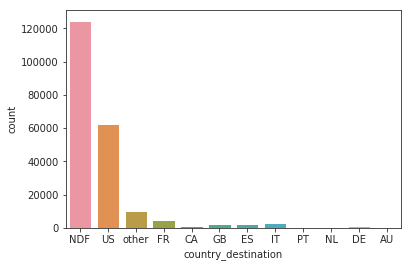

In [207]:
#DATA Visualisation
sns.countplot(x='country_destination', data=train_user)

#there  are large number of undefined countries with small other counties
#gender of most is unknown with very small unknown

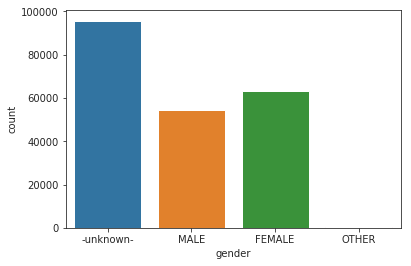

In [208]:
sns.countplot(x='gender' , data=train_user)

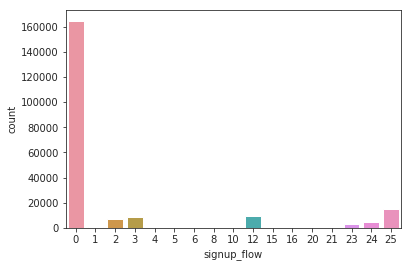

In [209]:
sns.countplot(x='signup_flow' , data=train_user)

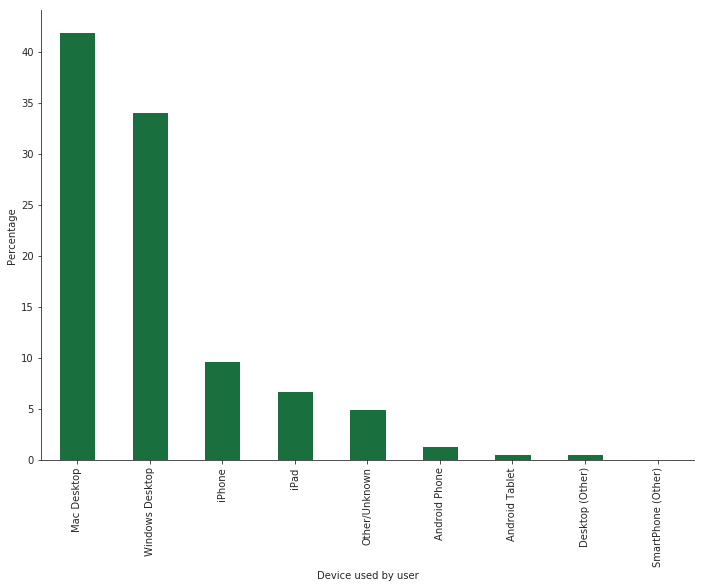

In [210]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
device_percentage = train_user.first_device_type.value_counts() / train_user.shape[0] * 100
device_percentage.plot(kind='bar',color='#196F3D')
plt.xlabel('Device used by user')
plt.ylabel('Percentage')
sns.despine()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


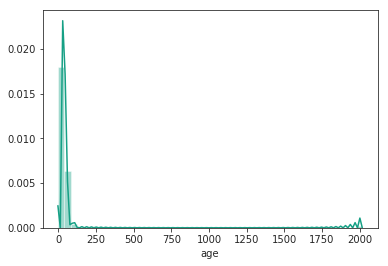

In [211]:
sns.distplot(train_user.age.dropna(), color='#16A085')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


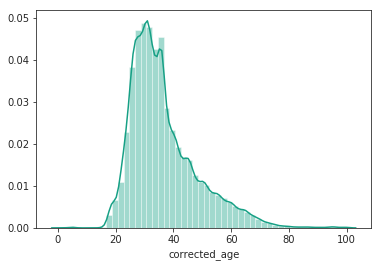

In [238]:
train_user['corrected_age']=train_user['age'].apply(lambda x : 36 if x>100 else x)
sns.distplot(train_user.corrected_age.dropna(), color='#16A085')


In [213]:
display((train_user.isnull().sum()/train_user.shape[0])*100)

id                          0.000000
date_account_created        0.000000
timestamp_first_active      0.000000
date_first_booking         58.347349
gender                      0.000000
age                        41.222576
signup_method               0.000000
signup_flow                 0.000000
language                    0.000000
affiliate_channel           0.000000
affiliate_provider          0.000000
first_affiliate_tracked     2.841402
signup_app                  0.000000
first_device_type           0.000000
first_browser               0.000000
country_destination         0.000000
corrected_age              41.222576
dtype: float64

In [214]:
train_user['date_account_created_new'] = pd.to_datetime(train_user['date_account_created'])
train_user['date_first_active_new'] = pd.to_datetime((train_user.timestamp_first_active // 1000000), format='%Y%m%d')

In [215]:
train_user['date_account_created_day'] = train_user.date_account_created_new.dt.weekday_name
train_user['date_account_created_month'] = train_user.date_account_created_new.dt.month
train_user['date_account_created_year'] = train_user.date_account_created_new.dt.year
train_user['date_first_active_day'] = train_user.date_first_active_new.dt.weekday_name
train_user['date_first_active_month'] = train_user.date_first_active_new.dt.month
train_user['date_first_active_year'] = train_user.date_first_active_new.dt.year

In [216]:
train_user['isequal']=~(train_user['date_account_created_new'] == train_user['date_first_active_new'])
#there are 178 rows whose values are not same for date_account_created adn date_first_active

In [217]:
#display(train_user.loc[train_user['isequal']==True])

In [218]:
#sns.countplot(x='country_destination', data=train_user.loc[train_user['isequal']==False])
#if both value are equal then there are greater changes of travel for value which are equal but 
# 213273 values are same and only 178 rows are different so they are reducible
display(train_user.head())


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,corrected_age,date_account_created_new,date_first_active_new,date_account_created_day,date_account_created_month,date_account_created_year,date_first_active_day,date_first_active_month,date_first_active_year,isequal
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,NaN,2010-06-28,2009-03-19,Monday,6,2010,Thursday,3,2009,True
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,38.0,2011-05-25,2009-05-23,Wednesday,5,2011,Saturday,5,2009,True
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,56.0,2010-09-28,2009-06-09,Tuesday,9,2010,Tuesday,6,2009,True
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,42.0,2011-12-05,2009-10-31,Monday,12,2011,Saturday,10,2009,True
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,41.0,2010-09-14,2009-12-08,Tuesday,9,2010,Tuesday,12,2009,True


In [219]:
train_user['isequal'].value_counts()/train_user.shape[0]*100

False    99.916608
True      0.083392
Name: isequal, dtype: float64

In [220]:
train_user['gender'].value_counts()/train_user.shape[0]*100

-unknown-    44.829024
FEMALE       29.534179
MALE         25.504683
OTHER         0.132115
Name: gender, dtype: float64

In [221]:
train_user['signup_method'].value_counts()/train_user.shape[0]*100

basic       71.630960
facebook    28.113244
google       0.255796
Name: signup_method, dtype: float64

In [222]:
train_user['language'].value_counts()/train_user.shape[0]*100

en    96.656375
zh     0.764578
fr     0.549072
es     0.428670
ko     0.349963
de     0.342936
it     0.240805
ru     0.182243
pt     0.112438
ja     0.105411
sv     0.057156
nl     0.045444
tr     0.029983
da     0.027173
pl     0.025299
cs     0.014992
no     0.014055
th     0.011244
el     0.011244
id     0.010307
hu     0.008433
fi     0.006559
is     0.002342
ca     0.002342
hr     0.000937
Name: language, dtype: float64

In [223]:
train_user['affiliate_channel'].value_counts()/train_user.shape[0]*100


direct           64.523942
sem-brand        12.201864
sem-non-brand     8.828256
other             4.198153
seo               4.058543
api               3.826171
content           1.849605
remarketing       0.513467
Name: affiliate_channel, dtype: float64

In [224]:
train_user['affiliate_provider'].value_counts()/train_user.shape[0]*100

direct                 64.382926
google                 24.217736
other                   5.879101
craigslist              1.626134
bing                    1.090648
facebook                1.064881
vast                    0.388380
padmapper               0.359802
facebook-open-graph     0.255328
yahoo                   0.232372
gsp                     0.212227
meetup                  0.162567
email-marketing         0.077770
naver                   0.024362
baidu                   0.013586
yandex                  0.007964
wayn                    0.003748
daum                    0.000468
Name: affiliate_provider, dtype: float64

In [225]:
train_user['first_affiliate_tracked'].value_counts()/train_user.shape[0]*100

untracked        51.174274
linked           21.685071
omg              20.605197
tracked-other     2.884034
product           0.728973
marketing         0.065120
local ops         0.015929
Name: first_affiliate_tracked, dtype: float64

In [234]:
#Dealing with first_afflicated_data and flling with untracked as it has most unfilled data
def definefirstaffiliate(cols):
    if pd.isnull(cols[0]):
        return 'untracked'
    else:
        return cols[0]
    

In [235]:
train_user['first_affiliate_tracked_updated'] = train_user[['first_affiliate_tracked']].apply( definefirstaffiliate , axis = 1) 

In [237]:
train_user['first_affiliate_tracked_updated'].value_counts()/train_user.shape[0]*100
#cleared affiliated data

untracked        54.015676
linked           21.685071
omg              20.605197
tracked-other     2.884034
product           0.728973
marketing         0.065120
local ops         0.015929
Name: first_affiliate_tracked_updated, dtype: float64

In [241]:
#current plan is to drop the date_first_booking
#something to do with age
#thinking maybe predicting the age with logistic regresson can work
#thinking filing them with 36 presently can work
display(train_user.sample(10))

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,corrected_age,date_account_created_new,date_first_active_new,date_account_created_day,date_account_created_month,date_account_created_year,date_first_active_day,date_first_active_month,date_first_active_year,isequal,first_affiliate_tracked_updated
181666,ne9kkc0y19,2014-04-28,20140428183929,2014-04-28,-unknown-,24.0,basic,24,en,direct,direct,untracked,Moweb,Windows Desktop,Chrome,US,24.0,2014-04-28,2014-04-28,Monday,4,2014,Monday,4,2014,False,untracked
103877,duujn3s9qj,2013-08-31,20130831183800,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,iPad,Mobile Safari,NDF,36.0,2013-08-31,2013-08-31,Saturday,8,2013,Saturday,8,2013,False,linked
85060,69tah687b6,2013-06-19,20130619174045,2013-06-21,MALE,36.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE,US,36.0,2013-06-19,2013-06-19,Wednesday,6,2013,Wednesday,6,2013,False,untracked
22654,ax4q2a2ers,2012-04-29,20120429185024,NaN,FEMALE,34.0,facebook,0,en,sem-non-brand,google,linked,Web,Mac Desktop,Safari,NDF,34.0,2012-04-29,2012-04-29,Sunday,4,2012,Sunday,4,2012,False,linked
156222,e9f7e0mazf,2014-02-24,20140224052725,2014-06-01,MALE,24.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Chrome,other,24.0,2014-02-24,2014-02-24,Monday,2,2014,Monday,2,2014,False,untracked
197353,hhncnsq4l2,2014-05-31,20140531013552,NaN,MALE,26.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,NDF,26.0,2014-05-31,2014-05-31,Saturday,5,2014,Saturday,5,2014,False,untracked
167457,7lbd6mmgkp,2014-03-25,20140325070150,NaN,-unknown-,NaN,basic,24,en,direct,direct,untracked,Moweb,Android Phone,Chrome Mobile,NDF,36.0,2014-03-25,2014-03-25,Tuesday,3,2014,Tuesday,3,2014,False,untracked
195983,pwamvo1h5m,2014-05-28,20140528070202,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,iPad,Mobile Safari,NDF,36.0,2014-05-28,2014-05-28,Wednesday,5,2014,Wednesday,5,2014,False,linked
208186,wzb67if5a8,2014-06-21,20140621154948,NaN,-unknown-,NaN,basic,0,en,other,email-marketing,tracked-other,Moweb,iPhone,Mobile Safari,NDF,36.0,2014-06-21,2014-06-21,Saturday,6,2014,Saturday,6,2014,False,tracked-other
161771,h24rgrtfin,2014-03-11,20140311032717,NaN,-unknown-,NaN,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,NDF,36.0,2014-03-11,2014-03-11,Tuesday,3,2014,Tuesday,3,2014,False,omg


In [239]:
def defineage(cols):
    if pd.isnull(cols[0]):
        return 36
    else:
        return cols[0]
    

In [240]:
train_user['corrected_age'] = train_user[['corrected_age']].apply( defineage , axis = 1) 

In [243]:
display(train_user.sample(10))
#creating dummy variable
gender = pd.get_dummies(train_user['gender'] ,prefix='gender')

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,corrected_age,date_account_created_new,date_first_active_new,date_account_created_day,date_account_created_month,date_account_created_year,date_first_active_day,date_first_active_month,date_first_active_year,isequal,first_affiliate_tracked_updated
82670,nre3us2ovy,2013-06-09,20130609170105,NaN,MALE,25.0,basic,0,en,other,padmapper,tracked-other,Web,Mac Desktop,Chrome,NDF,25.0,2013-06-09,2013-06-09,Sunday,6,2013,Sunday,6,2013,False,tracked-other
193995,m5bbod9lb3,2014-05-23,20140523184342,2014-07-01,-unknown-,59.0,basic,0,en,sem-brand,bing,omg,Web,iPad,Mobile Safari,other,59.0,2014-05-23,2014-05-23,Friday,5,2014,Friday,5,2014,False,omg
184964,ejty9v3h5c,2014-05-05,20140505214308,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,36.0,2014-05-05,2014-05-05,Monday,5,2014,Monday,5,2014,False,untracked
19709,4e67ee70yb,2012-03-25,20120325144550,NaN,FEMALE,40.0,basic,0,en,direct,direct,NaN,Web,Other/Unknown,-unknown-,NDF,40.0,2012-03-25,2012-03-25,Sunday,3,2012,Sunday,3,2012,False,untracked
87774,dsyk9d5tyy,2013-07-01,20130701180407,NaN,FEMALE,27.0,facebook,0,en,sem-brand,google,untracked,Web,Windows Desktop,Chrome,NDF,27.0,2013-07-01,2013-07-01,Monday,7,2013,Monday,7,2013,False,untracked
124567,qkkmgha2gd,2013-11-14,20131114203405,2013-11-14,-unknown-,25.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Firefox,US,25.0,2013-11-14,2013-11-14,Thursday,11,2013,Thursday,11,2013,False,omg
152023,89hxdzsa8h,2014-02-12,20140212045735,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Firefox,NDF,36.0,2014-02-12,2014-02-12,Wednesday,2,2014,Wednesday,2,2014,False,untracked
33063,m1ij2tnxcp,2012-07-21,20120721183450,NaN,-unknown-,NaN,basic,0,en,other,craigslist,tracked-other,Web,Windows Desktop,IE,NDF,36.0,2012-07-21,2012-07-21,Saturday,7,2012,Saturday,7,2012,False,tracked-other
118921,o78yr4l7cs,2013-10-23,20131023064329,NaN,FEMALE,20.0,facebook,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,NDF,20.0,2013-10-23,2013-10-23,Wednesday,10,2013,Wednesday,10,2013,False,omg
78335,ctlmm9a4nc,2013-05-20,20130520235749,NaN,FEMALE,32.0,facebook,0,de,direct,direct,linked,Web,Mac Desktop,Firefox,NDF,32.0,2013-05-20,2013-05-20,Monday,5,2013,Monday,5,2013,False,linked


In [252]:
gender.sample(5)

,gender_-unknown-,gender_FEMALE,gender_MALE,gender_OTHER,gender_combine
98185,0,0,1,0,0
64692,1,0,0,0,1
190710,0,0,1,0,0
172203,0,1,0,0,0
91873,0,0,1,0,0


In [249]:
gender['gender_combine']=(gender['gender_-unknown-']) | (gender['gender_OTHER'])

In [253]:
signup_method = pd.get_dummies(train_user['signup_method'] ,prefix='signup_method')
affiliate_channel = pd.get_dummies(train_user['affiliate_channel'] ,prefix='affiliate_channel')
affiliate_provider = pd.get_dummies(train_user['affiliate_provider'] ,prefix='affiliate_provider')

In [261]:
affiliate_provider.sample(10)

,affiliate_provider_baidu,affiliate_provider_bing,affiliate_provider_craigslist,affiliate_provider_daum,affiliate_provider_direct,affiliate_provider_email-marketing,affiliate_provider_facebook,affiliate_provider_facebook-open-graph,affiliate_provider_google,affiliate_provider_gsp,affiliate_provider_meetup,affiliate_provider_naver,affiliate_provider_other,affiliate_provider_padmapper,affiliate_provider_vast,affiliate_provider_wayn,affiliate_provider_yahoo,affiliate_provider_yandex,affiliate_provider_combine
119277,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
184845,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
71740,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
184496,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13414,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
134853,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
120737,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
146015,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
115737,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
192790,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [260]:
train_user['affiliate_provider'].value_counts()/train_user.shape[0]*100
affiliate_provider['affiliate_provider_combine']= affiliate_provider['affiliate_provider_vast'] | affiliate_provider['affiliate_provider_padmapper'] | affiliate_provider['affiliate_provider_facebook-open-graph'] | affiliate_provider['affiliate_provider_yahoo'] | affiliate_provider['affiliate_provider_gsp'] | affiliate_provider['affiliate_provider_meetup'] | affiliate_provider['affiliate_provider_email-marketing']  | affiliate_provider['affiliate_provider_naver'] | affiliate_provider['affiliate_provider_baidu']|affiliate_provider['affiliate_provider_yandex']|affiliate_provider['affiliate_provider_wayn'] | affiliate_provider['affiliate_provider_daum'] 